# Introduction

For this assignment, I am using FHFA's dataset of Annual House Prices Indexes by Census Tracts. I will be importing the data into the notebook "week 1 assignment" and then using python data analysis library (pandas) functions to explore the data. 

Here I am brining the `pandas` library to the python script and then giving the alias of `pd`.

In [3]:
import pandas as pd

Now, I am importing the dataset, using panda tool, pd.read_("file type"). For this assignment, I used a csv file named **fhfa house**. The data is from *[Federal Housing Finance Agency website](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx)*.

In [4]:
# read csv files and add to notebook
fhfa = pd.read_csv("fhfa house.csv")

<div class="alert alert-info">

Note, I chose to use `pandas` instead of `geopandas` because the dataset I chose is not a shapefile.
    
</div>

In [5]:
# what's the data type?
type(fhfa)

pandas.core.frame.DataFrame

## Data Types

First I want to know what types of data are in the dataframe using the `dtype` command. 

In [6]:
# what type of data is in the dataframe?
fhfa.dtypes

tract             int64
state_abbr       object
year              int64
annual_change    object
hpi              object
hpi1990          object
hpi2000          object
dtype: object

There are *five* objects (in other words "strings") and *two* intergers. Then I use `info()` to find out more information about the dataframe. 

In [7]:
fhfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665129 entries, 0 to 1665128
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   tract          1665129 non-null  int64 
 1   state_abbr     1665129 non-null  object
 2   year           1665129 non-null  int64 
 3   annual_change  1665129 non-null  object
 4   hpi            1665129 non-null  object
 5   hpi1990        1665129 non-null  object
 6   hpi2000        1665129 non-null  object
dtypes: int64(2), object(5)
memory usage: 88.9+ MB


`head()` shows us the first five rows of the dataframe and `tail()` shows the last five rows.

In [8]:
fhfa.head()

,tract,state_abbr,year,annual_change,hpi,hpi1990,hpi2000
0,1001020100,AL,1998,.,100.00,.,101.13
1,1001020100,AL,1999,-5.52,94.48,.,95.54
2,1001020100,AL,2000,4.66,98.88,.,100.00
3,1001020100,AL,2001,7.80,106.60,.,107.80
4,1001020100,AL,2002,7.01,114.07,.,115.36


In [9]:
fhfa.tail()

,tract,state_abbr,year,annual_change,hpi,hpi1990,hpi2000
1665124,56045951300,WY,2016,2.45,174.47,.,.
1665125,56045951300,WY,2017,-0.30,173.95,.,.
1665126,56045951300,WY,2018,4.59,181.93,.,.
1665127,56045951300,WY,2019,7.84,196.20,.,.
1665128,56045951300,WY,2020,-1.80,192.66,.,.


## Data Exploration

At minimum, run the following commands: `shape`, `info()`, `head()`, `plot()`,`value_counts()`, and
run a query on the data that filters it in some way.

In [10]:
# how many rows and columns?
fhfa.shape

(1665129, 7)

There are **1665129** rows and **7** columns. 

In [11]:
# what are the columns, using the `to_list()` function?
fhfa.columns.to_list()

['tract', 'state_abbr', 'year', 'annual_change', 'hpi', 'hpi1990', 'hpi2000']

I am choosing to look at the "state_abbr" column and I am pulling up 5 samples.

In [12]:
# single column
fhfa['state_abbr'].sample(5)

962539    NE
763085    MA
580907    IL
94369     CA
549405    IL
Name: state_abbr, dtype: object

Now, I am pulling up how many data points (or rows of data) there is for each state by using the `value_counts` function.

In [13]:
fhfa['state_abbr'].value_counts()

CA    237107
FL     93537
TX     79945
OH     77548
MI     76028
NY     75652
IL     75490
PA     67218
NJ     51307
NC     50722
VA     45338
GA     45301
WA     43375
MA     39302
WI     39218
IN     38156
MD     37573
MN     36311
CO     32605
MO     32451
AZ     31908
TN     29835
OR     23698
SC     23020
CT     22686
KY     21917
AL     20957
LA     19998
IA     19482
KS     16031
OK     15982
UT     15946
NV     14354
NE     11669
AR     11010
NM     10062
MS      9803
NH      8151
ID      7510
RI      6678
ME      6631
HI      6216
DE      5991
MT      5367
WV      4990
VT      4263
SD      3926
WY      3441
DC      3311
ND      3127
AK      2985
Name: state_abbr, dtype: int64

In [14]:
# save "state_count" as a variable so I can use it later
state_count=fhfa['state_abbr'].value_counts()
state_count

CA    237107
FL     93537
TX     79945
OH     77548
MI     76028
NY     75652
IL     75490
PA     67218
NJ     51307
NC     50722
VA     45338
GA     45301
WA     43375
MA     39302
WI     39218
IN     38156
MD     37573
MN     36311
CO     32605
MO     32451
AZ     31908
TN     29835
OR     23698
SC     23020
CT     22686
KY     21917
AL     20957
LA     19998
IA     19482
KS     16031
OK     15982
UT     15946
NV     14354
NE     11669
AR     11010
NM     10062
MS      9803
NH      8151
ID      7510
RI      6678
ME      6631
HI      6216
DE      5991
MT      5367
WV      4990
VT      4263
SD      3926
WY      3441
DC      3311
ND      3127
AK      2985
Name: state_abbr, dtype: int64

In [15]:
# what type of data is state_count?
type (state_count)

pandas.core.series.Series

It saved as a series. I convert it into a dataframe using the `reset_index()` function.

In [16]:
# convert series into a dataframe
state_count = state_count.reset_index()
state_count

,index,state_abbr
0,CA,237107
1,FL,93537
2,TX,79945
3,OH,77548
4,MI,76028
5,NY,75652
6,IL,75490
7,PA,67218
8,NJ,51307
9,NC,50722


In [17]:
type (state_count)

pandas.core.frame.DataFrame

## Rename Column

I will be renaming the columns in the dataframe that I have just converted.

In [18]:
# current columns in a list 
state_count.columns.to_list()

['index', 'state_abbr']

In [19]:
state_count.columns= ['state','count']

In [20]:
state_count

,state,count
0,CA,237107
1,FL,93537
2,TX,79945
3,OH,77548
4,MI,76028
5,NY,75652
6,IL,75490
7,PA,67218
8,NJ,51307
9,NC,50722


## Plot & Query

For this part, I will plot the 'state_count' dataframe, trim the data, and then attempt to run a query. 

<AxesSubplot:>

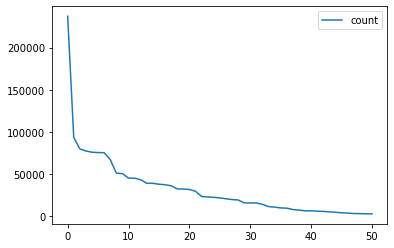

In [21]:
state_count.plot()

<AxesSubplot:title={'center':'Number of census tracts per state'}, xlabel='state'>

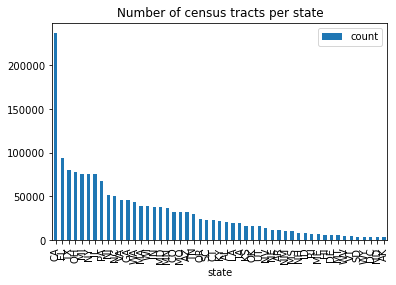

In [22]:
# adding more information to the plot
state_count.plot.bar(x= 'state', y= 'count', title= 'Number of census tracts per state') 

<div class="alert alert-info">

Note, California has the most census tracts. 
    
</div>

### Trimming the data

I will be elimating some columns.

In [23]:
# original data
fhfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665129 entries, 0 to 1665128
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   tract          1665129 non-null  int64 
 1   state_abbr     1665129 non-null  object
 2   year           1665129 non-null  int64 
 3   annual_change  1665129 non-null  object
 4   hpi            1665129 non-null  object
 5   hpi1990        1665129 non-null  object
 6   hpi2000        1665129 non-null  object
dtypes: int64(2), object(5)
memory usage: 88.9+ MB


In [24]:
fhfa[['tract','state_abbr','year','annual_change']]

,tract,state_abbr,year,annual_change
0,1001020100,AL,1998,.
1,1001020100,AL,1999,-5.52
2,1001020100,AL,2000,4.66
3,1001020100,AL,2001,7.80
4,1001020100,AL,2002,7.01
...,...,...,...,...
1665124,56045951300,WY,2016,2.45
1665125,56045951300,WY,2017,-0.30
1665126,56045951300,WY,2018,4.59
1665127,56045951300,WY,2019,7.84


In [25]:
# creating a new variable for the dataframe with the desired columns 
fhfa_trimmed= fhfa[['tract','state_abbr','year','annual_change']].copy()
fhfa_trimmed

,tract,state_abbr,year,annual_change
0,1001020100,AL,1998,.
1,1001020100,AL,1999,-5.52
2,1001020100,AL,2000,4.66
3,1001020100,AL,2001,7.80
4,1001020100,AL,2002,7.01
...,...,...,...,...
1665124,56045951300,WY,2016,2.45
1665125,56045951300,WY,2017,-0.30
1665126,56045951300,WY,2018,4.59
1665127,56045951300,WY,2019,7.84


### Subsetting/querying/filtering the data

Now I filter for only California data.

In [27]:
fhfa_trimmed[fhfa_trimmed.state_abbr=='CA']

,tract,state_abbr,year,annual_change
66860,6001400100,CA,1986,.
66861,6001400100,CA,1987,2.73
66862,6001400100,CA,1988,26.78
66863,6001400100,CA,1989,8.93
66864,6001400100,CA,1990,5.81
...,...,...,...,...
303962,6115041100,CA,2016,8.63
303963,6115041100,CA,2017,-0.78
303964,6115041100,CA,2018,9.72
303965,6115041100,CA,2019,3.72
